# SEP 775 Assignment 1

## Question 1

In [1]:
# Import libraries that are needed for text data preprocessing and training word vectors, and the Reuters corpus for training Word2Vec
import numpy as np
from sklearn.cluster import DBSCAN
from gensim.models import Word2Vec,KeyedVectors
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import reuters
import nltk
nltk.download('reuters')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\jimta\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jimta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jimta\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\jimta\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jimta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
type(reuters)

nltk.corpus.util.LazyCorpusLoader

In [3]:
# Check how many documents and categories of documents Reuters corpus has
print("Reuters corpus has {} categories of documents".format(len(reuters.categories())))
print("Reuters corpus has {} documents".format(len(reuters.fileids())))

Reuters corpus has 90 categories of documents
Reuters corpus has 10788 documents


In [4]:
# Get documents' names
doc_names = np.array(reuters.fileids())
# Get the content of the documents in form of words then join the words with space characters
corpus = [" ".join([w for w in reuters.words(doc_names[t])]) for t in range(len(doc_names))]

In [5]:
def clean_corpus(texts, string_line=True, stopping=True):
    """
    Function for cleaning text data and return list of strings for NLP model to use
    
    Parameters
    texts: list objects that contains text data as strings
    string_line: if True(default), each returned text is a single string;
    if False, each text will be returned as a list of words in the original sequence
    stopping: if True(default), filter out stopwords from text data
    """
    # Initialize a list to contain cleaned text data
    cleaned = []
    i = 0
    # Get stop words in English
    stop_wrds = set(stopwords.words("english"))
    print("Text data cleaning initiated")
    for text in texts:
        if (i + 1) % 500 == 0:
            print(f"Cleaning text #{i + 1} out of {len(texts)}")
        try:
            # Replace all char that are not alphabetical with space
            text = re.sub("[^a-zA-Z]", " ", text)
            # Tokenize the text to split it into list of words
            text = word_tokenize(text)
            text = [t.lower() for t in text]
            
            if stopping:
                # Remove the stop words if stopping is True
                text = [t for t in text if t not in stop_wrds]

            cleaned.append(text)
        except TypeError:
            cleaned.append([])
        i += 1
    
    if string_line:
        # Join the cleaned words text back together if string_line is True
        cleaned = [" ".join(t) for t in cleaned]
    return cleaned

In [6]:
corpus_cleaned = clean_corpus(corpus, string_line=False)

Text data cleaning initiated
Cleaning text #500 out of 10788
Cleaning text #1000 out of 10788
Cleaning text #1500 out of 10788
Cleaning text #2000 out of 10788
Cleaning text #2500 out of 10788
Cleaning text #3000 out of 10788
Cleaning text #3500 out of 10788
Cleaning text #4000 out of 10788
Cleaning text #4500 out of 10788
Cleaning text #5000 out of 10788
Cleaning text #5500 out of 10788
Cleaning text #6000 out of 10788
Cleaning text #6500 out of 10788
Cleaning text #7000 out of 10788
Cleaning text #7500 out of 10788
Cleaning text #8000 out of 10788
Cleaning text #8500 out of 10788
Cleaning text #9000 out of 10788
Cleaning text #9500 out of 10788
Cleaning text #10000 out of 10788
Cleaning text #10500 out of 10788


In [7]:
# Set up logging for training Word2Vec model
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
# Train the Word2Vec model with min_count equal to 3 to filter potential typos 
# and very rare words (e.g. random people's names) in the corpus 
model = Word2Vec(corpus_cleaned, min_count=3)

2024-02-05 18:19:58,866 : INFO : collecting all words and their counts
2024-02-05 18:19:58,868 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2024-02-05 18:19:59,105 : INFO : PROGRESS: at sentence #10000, processed 808488 words, keeping 28077 word types
2024-02-05 18:19:59,131 : INFO : collected 29040 word types from a corpus of 874296 raw words and 10788 sentences
2024-02-05 18:19:59,132 : INFO : Creating a fresh vocabulary
2024-02-05 18:19:59,236 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=3 retains 14273 unique words (49.15% of original 29040, drops 14767)', 'datetime': '2024-02-05T18:19:59.236715', 'gensim': '4.3.2', 'python': '3.8.18 (default, Sep 11 2023, 13:39:12) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22631-SP0', 'event': 'prepare_vocab'}
2024-02-05 18:19:59,238 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=3 leaves 855317 word corpus (97.83% of original 874296, drops 18979)', 'datetime': '2024-

In [8]:
# Import libraries for visualizing word vectors
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import plotly.express as px
from collections import Counter

2024-02-05 18:20:07,685 : INFO : Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2024-02-05 18:20:07,687 : INFO : NumExpr defaulting to 8 threads.


In [9]:
# Get the vocabulary of the word vectors
reuters_vocab = model.wv.key_to_index.keys()

In [10]:
# Put all word vectors into an nd array(matrix)
word_matrix = np.array([model.wv[word] for word in reuters_vocab])

In [11]:
# Use PCA to reduce the dimension down to 2 so the vectors can be visualized 
pca = PCA(n_components=2)
pca_result = pca.fit_transform(word_matrix)

In [12]:
pca_result.shape

(14273, 2)

In [13]:
# Join the 2D vectors with their corresponding words
word_keyedvec_2d = KeyedVectors(pca_result.shape[1])
word_keyedvec_2d.add_vectors(list(reuters_vocab), pca_result)

In [14]:
def corpus_words_freq(tokenized_text):
    """
    Function to get the frequencies of unique words from tokenized_text
    
    Parameter:
    tokenized_text should be in the form of [['a'], ['a', 'b'], ['b']] format,
    where the object is a list of tokenized text, with each tokenized text
    as a list of word tokens
    
    Output:
    word_freq: a Counter object that summarizes the word frequency of the input
    tokenized_text
    """
    word_freq = Counter()
    # For each tokennized text, update the word frequency counter
    for text in tokenized_text:
        word_freq.update(text)
    print(f"This corpus has {len(word_freq.keys())} unique words, and the 10 most frequent words are: {word_freq.most_common(10)}")
    return word_freq

In [15]:
word_freq = corpus_words_freq(corpus_cleaned)

This corpus has 29040 unique words, and the 10 most frequent words are: [('said', 25383), ('mln', 18623), ('vs', 14341), ('dlrs', 12417), ('pct', 9810), ('lt', 8696), ('cts', 8361), ('year', 7529), ('net', 6989), ('u', 6392)]


In [16]:
# Get the all or 50/100/250/500/1000 most frequent words in the corpus
#top_freq_words = [counter[0] for counter in word_freq.most_common(50)]
#top_freq_words = [counter[0] for counter in word_freq.most_common(100)]
#top_freq_words = [counter[0] for counter in word_freq.most_common(250)]
#top_freq_words = [counter[0] for counter in word_freq.most_common(500)]
top_freq_words = [counter[0] for counter in word_freq.most_common(1000)]
#top_freq_words = [counter[0] for counter in word_freq.most_common(5000)]
#top_freq_words = [counter[0] for counter in word_freq.most_common(len(reuters_vocab))]

In [17]:
# Get the word vectors and frequencies of the words into numpy arrays
x,y = np.array([word_keyedvec_2d[word] for word in top_freq_words]).T
frequencies = np.array([word_freq[word] for word in top_freq_words])

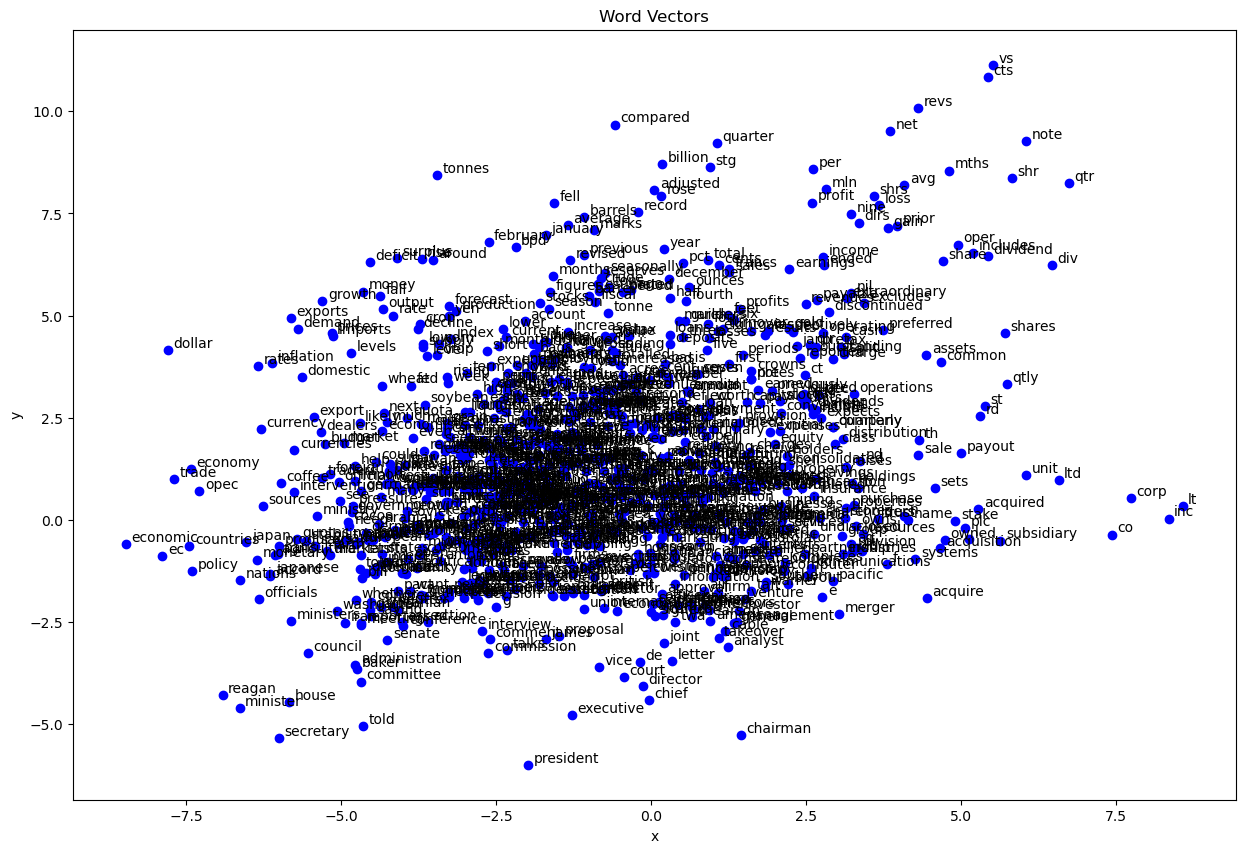

In [18]:
# Using Matplotlib to visualize word vectors 
fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(x, y, c='b')

for i, word in enumerate(top_freq_words):
    ax.annotate(
        word,
        (x[i], y[i]),
        xytext=(4, 2),
        textcoords='offset points'
    )

plt.title('Word Vectors')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [19]:
# Using Plotly to visualize word vectors for its zooming functionality and indicating frequencies of words with color of the points
plot = px.scatter(x=x, y=y,title="Word Vectors",text=top_freq_words, width=1000, height=800, color=np.log(frequencies),
                 labels={'color':'ln(Frequency)'})
plot.update_traces(textposition='top center')
 
# Showing Scatter Plot with Scroll Zoom.
plot.show(config={'scrollZoom': True})

## Question 2

In [20]:
from scipy import spatial

In [21]:
# Initialize a dictionary to cotain the word vectors
glove_dict = {}
with open("glove.6B.100d.txt", 'r', encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        glove_dict[word] = vector

In [22]:
len(glove_dict.keys())

400000

In [23]:
def cos_sim(v1, v2):
    """
    Function to compute the cosine similarity between two vectors v1 and v2
    """
    return np.dot(v1, v2)/((np.sqrt(np.dot(v1,v1))) * (np.sqrt(np.dot(v2, v2))))

def find_closest_word(vector, keyed_word_vectors):
    """
    Function to get the word(s) from a group of keyed word vectors whose word vector(s) is(are) closest 
    (with cosine similarity as metric) to the input vector
    
    Parameter:
    vector: The vector which we are trying to find the closest word vector to it 
    keyed_word_vectors: A dictionary with words strings as keys and their corresponding word vectors as values
    
    Output:
    a list of words sorted by their word vectors' Euclidean distances to the input vector
    """
    # Define a lambda function to calculate the cosine similarity 
    distance_func = lambda word_token: cos_sim(keyed_word_vectors[word_token], vector)
    return sorted(keyed_word_vectors.keys(), key=distance_func, reverse=True)


Conduct analogy tasks using the find\_closest\_word defined above

In [24]:
find_closest_word((glove_dict['king']-glove_dict['man']+glove_dict['woman']),glove_dict)[:5]

['king', 'queen', 'monarch', 'throne', 'daughter']

In [25]:
find_closest_word((glove_dict['king']-glove_dict['father']+glove_dict['son']),glove_dict)[:5]

['king', 'prince', 'son', 'nephew', 'throne']

In [26]:
find_closest_word((glove_dict['woman']-glove_dict['singular']+glove_dict['plural']),glove_dict)[:5]

['woman', 'mother', 'girl', 'pregnant', 'boy']

In [27]:
sim_rank = find_closest_word((glove_dict['woman']-glove_dict['singular']+glove_dict['plural']),glove_dict).index('women')
print("The vector for 'women' is the number {} most similar vector in GloVe to 'woman' - 'singular' + 'plural'".format(sim_rank+1))

The vector for 'women' is the number 11 most similar vector in GloVe to 'woman' - 'singular' + 'plural'


In [28]:
find_closest_word((glove_dict['find']-glove_dict['present']+glove_dict['past']),glove_dict)[:5]

['past', 'find', 'back', 'away', 'trying']

In [29]:
sim_rank = find_closest_word((glove_dict['find']-glove_dict['present']+glove_dict['past']),glove_dict).index('found')
print("The vector for 'found' is the number {} most similar vector in GloVe to 'find' - 'present' + 'past'".format(sim_rank+1))

The vector for 'found' is the number 726 most similar vector in GloVe to 'find' - 'present' + 'past'


In [30]:
find_closest_word((glove_dict['finger']-glove_dict['hand']+glove_dict['foot']),glove_dict)[8:15]

['toes', 'calf', 'groin', 'bruise', 'wrist', 'ankle', 'toe']

In [31]:
sim_rank = find_closest_word((glove_dict['white']-glove_dict['black']+glove_dict['yang']),glove_dict).index('yin')
print("The vector for 'yin' is the number {} most similar vector in GloVe to 'white' - 'black' + 'yang'".format(sim_rank+1))

The vector for 'yin' is the number 62 most similar vector in GloVe to 'white' - 'black' + 'yang'


## Question 3

In [32]:
# Find the common words in both the pre-trained GloVe and the word vectors trained with Word2Vec and Reuters corpus
intersect_vocab = set(glove_dict.keys()).intersection(reuters_vocab)

In [33]:
len(intersect_vocab)

13367

As shown in the cell above, there are in total 11017 words that have appeared in both the pre-trained GloVe and the word vectors trained with Word2Vec model and Reuters corpus.

In [34]:
# Create two dictionaries that contains the cosine similarity and Euclidean distance between the corresponding vectors 
# from GloVe and Word2Vec of each of the common words
intersect_vocab_cos_sim = {}
intersect_vocab_eu_dist = {}
for word in intersect_vocab:
    intersect_vocab_cos_sim[word] = cos_sim(glove_dict[word], model.wv[word])
    intersect_vocab_eu_dist[word] = spatial.distance.euclidean(glove_dict[word], model.wv[word])

In [35]:
sorted_intersect_words_by_dist = sorted(intersect_vocab_eu_dist.keys(), key=lambda word: intersect_vocab_eu_dist[word])
sorted_intersect_words_by_sim = sorted(intersect_vocab_cos_sim.keys(), key=lambda word: intersect_vocab_cos_sim[word])

In [36]:
# Using Plotly to create a scatter plot to try to find if there is some correlation between 
# the similarities/distances(the cell below) between word vectors trained with Word2Vec and pre-trained GloVe on the common words
# and the frequencies of the common words in Reuters corpus
intersect_similarities = np.array([intersect_vocab_cos_sim[word] for word in sorted_intersect_words_by_sim])
intersect_frequencies = np.array([word_freq[word] for word in sorted_intersect_words_by_sim])
# Log is applied on the values of frequencies because they vary from less than 10 up to tens of thousands
plot = px.scatter(x=intersect_similarities, y=np.log(intersect_frequencies),title="Cosine Similarity with GloVe vs Frequency in Reuters",
                  width=1000, height=800, labels={'x':'Cosine Similarity between Word2Vec Embedding and GloVe',
                                                  'y':'ln(Frequency in Reuters Corpus)'})
plot 
# Showing Scatter Plot with Scroll Zoom.
plot.show(config={'scrollZoom': True})

In [37]:
intersect_distances = np.array([intersect_vocab_eu_dist[word] for word in sorted_intersect_words_by_dist])
intersect_frequencies = np.array([word_freq[word] for word in sorted_intersect_words_by_dist])
# Log is applied on the values of frequencies because they vary from less than 10 up to tens of thousands
plot = px.scatter(x=intersect_distances, y=np.log(intersect_frequencies),title="Distance to GloVe vs Frequency in Reuters",
                  width=1000, height=800, labels={'x':'Euclidean Distance between Word2Vec Embedding and GloVe',
                                                  'y':'ln(Frequency in Reuters Corpus)'})
plot 
# Showing Scatter Plot with Scroll Zoom.
plot.show(config={'scrollZoom': True})

In [38]:
sim_rank = find_closest_word((model.wv['king']-model.wv['father']+model.wv['son']),
                  dict(zip(model.wv.key_to_index.keys(), model.wv.vectors))).index('prince')
print("The vector for 'prince' is the number {} most similar vector trained by Word2Vec to 'king' - 'father' + 'son'".format(sim_rank+1))

The vector for 'prince' is the number 70 most similar vector trained by Word2Vec to 'king' - 'father' + 'son'


In [39]:
cosine_sim = cos_sim((glove_dict['king']-glove_dict['father']+glove_dict['son']), glove_dict['prince'])
print("The cosine similarity between the GloVe word vectors 'prince' and 'king' - 'father' + 'son' is {0:0.3f}".format(cosine_sim))

The cosine similarity between the GloVe word vectors 'prince' and 'king' - 'father' + 'son' is 0.798


In [40]:
cosine_sim = cos_sim((model.wv['king']-model.wv['father']+model.wv['son']), model.wv['prince'])
print("The cosine similarity between the Word2Vec word vectors 'prince' and 'king' - 'father' + 'son' is {0:0.3f}".format(cosine_sim))

The cosine similarity between the Word2Vec word vectors 'prince' and 'king' - 'father' + 'son' is 0.827


In [41]:
sim_rank = find_closest_word((model.wv['find']-model.wv['present']+model.wv['past']),
                  dict(zip(model.wv.key_to_index.keys(), model.wv.vectors))).index('found')
print("The vector for 'found' is the number {} most similar vector trained by Word2Vec to 'find' - 'present' + 'past'".format(sim_rank+1))

The vector for 'found' is the number 6379 most similar vector trained by Word2Vec to 'find' - 'present' + 'past'


In [42]:
cosine_sim = cos_sim((glove_dict['find']-glove_dict['present']+glove_dict['past']), glove_dict['found'])
print("The cosine similarity between the GloVe word vectors 'found' and 'find' - 'present' + 'past' is {0:0.3f}".format(cosine_sim))

The cosine similarity between the GloVe word vectors 'found' and 'find' - 'present' + 'past' is 0.464


In [43]:
cosine_sim = cos_sim((model.wv['find']-model.wv['present']+model.wv['past']), model.wv['found'])
print("The cosine similarity between the Word2Vec word vectors 'found' and 'find' - 'present' + 'past' is {0:0.3f}".format(cosine_sim))

The cosine similarity between the Word2Vec word vectors 'found' and 'find' - 'present' + 'past' is 0.320
